# Optimization Project 1 – Linear Programming
## Marketing Budget Allocation

## Team

<pre>
<b>Name:</b> Manideep Telukuntla     <b>UT EID:</b> mt39528
<b>Name:</b> Krittika Deshwal        <b>UT EID:</b> kd29275
<b>Name:</b> David Gong              <b>UT EID:</b> dg38767
<b>Name:</b> Teja Sirigina           <b>UT EID:</b> ts37662
</pre>

In [109]:
# import statements
import numpy as np
import pandas as pd
import gurobipy as gp
import matplotlib.pyplot as plt
import seaborn as sns

## Part 1, 2, & 3

Assume that your company is deciding how to spend a marketing budget of $10M. You work in the marketing department as a data scientist and the chief marketing officer has asked you write a report recommending how to spread this budget among several marketing mediums. Your department has employed an outside consulting firm to estimate the return on investment (ROI) of each marketing medium under consideration. The results are in the table below, and also in a CSV attached to this assignment:

On top of these ROIs, your boss has decided to constrain your budget as follows:  
- The amount invested in print and TV should be no more than the amount spent on Facebook and Email. Surprisingly, email seems to be a great channel for reaching real people.
- The total amount used in social media (Facebook, LinkedIn, Instagram, Snapchat, and Twitter) should be at least twice of SEO and AdWords.
- For each platform, the amount invested should be no more than $3M.

Formulate the marketing budget allocation problem as a linear program. Use gurobi to find the
optimal budget allocation.

In [110]:
# Read csv file
roi_df = pd.read_csv('ROI_data.csv')

In [111]:
# Specify number of decision variables and assign names
adver_mod_x_1 = adver_mod_1.addMVar(len(var_names), ub=3, name=var_names)

In [112]:
# budget
budget = 10

# Convert column names to lowercase for case-insensitive matching
roi_df.columns = roi_df.columns.str.lower()

# Extract column names for decision variables
var_names = roi_df.columns[1:].tolist()

# Create an empty dataframe to store results
results_df = pd.DataFrame(columns=var_names + ['objective value'])

# Create a dictionary mapping column names to their respective ROI values
roi_dict_1 = dict(zip(var_names, roi_df.iloc[0][1:].values))

# Initiate model
adver_mod_1 = gp.Model()

# Specify number of decision variables and assign names
adver_mod_x_1 = adver_mod_1.addMVar(len(var_names), ub=3, name=var_names)

# Create a dictionary to map variable names to the decision variable objects
var_dict = {name: adver_mod_x_1[j] for j, name in enumerate(var_names)}

# Set objective using the roi_dict
adver_mod_1.setObjective(gp.quicksum(roi_dict_1[name] * var_dict[name] for name in var_names), sense=gp.GRB.MAXIMIZE)

# Add constraints
adver_mod_1.addConstr(gp.quicksum(var_dict[name] for name in var_names) <= budget)  # Marketing Budget
adver_mod_1.addConstr(var_dict['print'] + var_dict['tv'] - var_dict['facebook'] - var_dict['email'] <= 0)  # Print & TV Budget Constraint
adver_mod_1.addConstr(gp.quicksum(var_dict[social] for social in ['facebook', 'linkedin', 'instagram', 'snapchat', 'twitter'] if social in var_names ) >= 2 * var_dict['seo'] + 2 * var_dict['adwords'])  # Social Media Budget Constraint 

adver_mod_1.Params.OutputFlag = 0

# Optimize the model
adver_mod_1.optimize()

optimal_allocations = list(adver_mod_x_1.x)
optimal_objvalue = adver_mod_1.objVal

# Append results to the dataframe
results_df.loc[0] = optimal_allocations + [optimal_objvalue]

results_df

,print,tv,seo,adwords,facebook,linkedin,instagram,snapchat,twitter,email,objective value
0,0.0,3.0,0.0,1.0,0.0,0.0,3.0,0.0,0.0,3.0,0.456


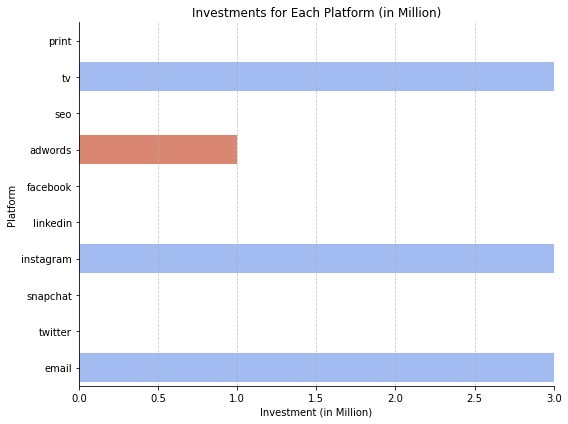

In [113]:
# Extract the first row and drop the 'objective value' column
row1 = results_df.iloc[0].drop('objective value')

base_color = sns.color_palette("coolwarm", 10)[-2]
highlight_color = sns.color_palette("coolwarm", 10)[2]
colors = [highlight_color if value == 3 else base_color for value in row1]

# Plotting
plt.figure(figsize=(8, 6))
sns.barplot(y=row1.index, x=row1.values, palette=colors)

plt.title('Investments for Each Platform (in Million)')
plt.xlabel('Investment (in Million)')
plt.ylabel('Platform')
plt.xlim(0, 3)  # Set x-axis limit to 3 million
plt.grid(axis='x', linestyle='--', alpha=0.7)

sns.despine()

# Display the plot
plt.tight_layout()

# plt.savefig("investment_plot_1.png", format='png', dpi=300)

plt.show()

## Part 4

Your boss is happy to see the promising results presented by the marketing department.However, your boss is also very concerned because your boss recalls being somewhat disappointed after following such recommendations in the past. To be cautious about the decision, your team has decided to get another opinion about the ROI data and rerun the analysis. The second consulting firm returns the estimates of the ROI data in the table below (also in the CSV file mentioned above). You are asked to compare the two optimal allocations from these two ROI estimates.

In [114]:
# budget
budget = 10

# Convert column names to lowercase for case-insensitive matching
roi_df.columns = roi_df.columns.str.lower()

# Extract column names for decision variables
var_names = roi_df.columns[1:].tolist()

# Create a dictionary mapping column names to their respective ROI values
roi_dict_2 = dict(zip(var_names, roi_df.iloc[1][1:].values))

# Initiate model
adver_mod_2 = gp.Model()

# Specify number of decision variables and assign names
adver_mod_x_2 = adver_mod_2.addMVar(len(var_names), ub=3, name=var_names)

# Create a dictionary to map variable names to the decision variable objects
var_dict = {name: adver_mod_x_2[j] for j, name in enumerate(var_names)}

# Set objective using the roi_dict
adver_mod_2.setObjective(gp.quicksum(roi_dict_2[name] * var_dict[name] for name in var_names), sense=gp.GRB.MAXIMIZE)

# Add constraints
adver_mod_2.addConstr(gp.quicksum(var_dict[name] for name in var_names) <= budget)  # Marketing Budget
adver_mod_2.addConstr(var_dict['print'] + var_dict['tv'] - var_dict['facebook'] - var_dict['email'] <= 0)  # Print & TV Budget Constraint
adver_mod_2.addConstr(gp.quicksum(var_dict[social] for social in ['facebook', 'linkedin', 'instagram', 'snapchat', 'twitter'] if social in var_names ) >= 2 * var_dict['seo'] + 2 * var_dict['adwords'])  # Social Media Budget Constraint 

adver_mod_2.Params.OutputFlag = 0

# Optimize the model
adver_mod_2.optimize()

optimal_allocations = list(adver_mod_x_2.x)
optimal_objvalue = adver_mod_2.objVal

# Append results to the dataframe
results_df.loc[1] = optimal_allocations + [optimal_objvalue]

results_df

,print,tv,seo,adwords,facebook,linkedin,instagram,snapchat,twitter,email,objective value
0,0.0,3.0,0.0,1.0,0.0,0.0,3.0,0.0,0.0,3.0,0.456
1,3.0,0.0,0.0,1.0,3.0,3.0,0.0,0.0,0.0,0.0,0.456


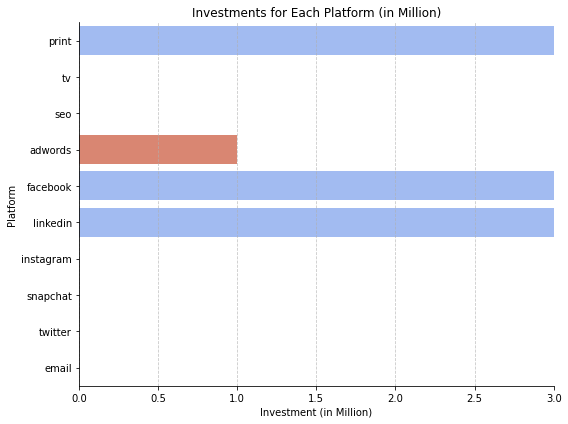

In [115]:
# Extract the first row and drop the 'objective value' column
row2 = results_df.iloc[1].drop('objective value')

base_color = sns.color_palette("coolwarm", 10)[-2]
highlight_color = sns.color_palette("coolwarm", 10)[2]
colors = [highlight_color if value == 3 else base_color for value in row2]

# Plotting
plt.figure(figsize=(8, 6))
sns.barplot(y=row2.index, x=row2.values, palette=colors)

plt.title('Investments for Each Platform (in Million)')
plt.xlabel('Investment (in Million)')
plt.ylabel('Platform')
plt.xlim(0, 3)  # Set x-axis limit to 3 million
plt.grid(axis='x', linestyle='--', alpha=0.7)

sns.despine()

# Display the plot
plt.tight_layout()

# plt.savefig("investment_plot_2.png", format='png', dpi=300)

plt.show()

## Part 5

Are the allocations the same? Assuming the first ROI data is correct, if you were to use the second allocation (the allocation that assumed the second ROI data was correct) how much lower would the objective be relative to the optimal objective (the one that uses the first ROI data and the first allocation)? Assuming the second ROI data is correct, if you used the first allocation how much lower would the objective be relative to the optimal objective? Do you think the third constraint above, based on your boss’ experience, is useful?

In [116]:
allocations_12 = list(adver_mod_x_2.x * list(roi_dict_1.values()))
allocations_12

[0.093, 0.0, 0.0, 0.039, 0.048, 0.07200000000000001, 0.0, 0.0, 0.0, 0.0]

In [117]:
total_roi_12 = np.sum(adver_mod_x_2.x * list(roi_dict_1.values()))
total_roi_12

0.252

In [118]:
total_roi_1 = results_df['objective value'][0]

print(f"Total ROI considering first ROI estimates is correct and the second budget allocation: ${total_roi_12:.3f} million")
print(f"Total ROI considering first ROI estimates is correct and the first budget allocation: ${total_roi_1:.3f} million")

# Difference in both the estimates
print(f"Total ROI is lower by ${(total_roi_1 - total_roi_12):.3f} than the optimal total ROI for first firm estimates")

Total ROI considering first ROI estimates is correct and the second budget allocation: $0.252 million
Total ROI considering first ROI estimates is correct and the first budget allocation: $0.456 million
Total ROI is lower by $0.204 than the optimal total ROI for first firm estimates


In [119]:
allocations_21 = list(adver_mod_x_1.x * list(roi_dict_2.values()))
allocations_21

[0.0, 0.069, 0.0, 0.039, 0.0, 0.0, 0.078, 0.0, 0.0, 0.078]

In [120]:
total_roi_21 = np.sum(adver_mod_x_1.x * list(roi_dict_2.values()))
total_roi_21

0.264

In [121]:
total_roi_2 = results_df['objective value'][1]

print(f"Total ROI considering second ROI estimates is correct and the first budget allocation: ${total_roi_21:.3f} million")
print(f"Total ROI considering second ROI estimates is correct and the second budget allocation: ${total_roi_2:.3f} million")

# Difference in both the estimates
print(f"Total ROI is lower by ${(total_roi_2 - total_roi_21):.3f} the the optimal total ROI for second firm estimates")

Total ROI considering second ROI estimates is correct and the first budget allocation: $0.264 million
Total ROI considering second ROI estimates is correct and the second budget allocation: $0.456 million
Total ROI is lower by $0.192 the the optimal total ROI for second firm estimates


In [122]:
def optimize_allocation(roi_df, budget):
    
    # budget
    budget = budget
    
    # Convert column names to lowercase for case-insensitive matching
    roi_df.columns = roi_df.columns.str.lower()

    # Extract column names for decision variables
    var_names = roi_df.columns[1:].tolist()

    # Create an empty dataframe to store results
    results_df = pd.DataFrame(columns=var_names + ['objective value'])

    for i in range(len(roi_df)):
        # Create a dictionary mapping column names to their respective ROI values
        roi_dict = dict(zip(var_names, roi_df.iloc[i][1:].values))
        
        # Initiate model
        adver_mod = gp.Model()

        # Specify number of decision variables and assign names
        adver_mod_x = adver_mod.addMVar(len(var_names), name=var_names)
        
        # Create a dictionary to map variable names to the decision variable objects
        var_dict = {name: adver_mod_x[j] for j, name in enumerate(var_names)}
        
        # Set objective using the roi_dict
        adver_mod.setObjective(gp.quicksum(roi_dict[name] * var_dict[name] for name in var_names), sense=gp.GRB.MAXIMIZE)

        # Add constraints
        adver_mod.addConstr(gp.quicksum(var_dict[name] for name in var_names) <= budget)  # Marketing Budget
        adver_mod.addConstr(var_dict['print'] + var_dict['tv'] - var_dict['facebook'] - var_dict['email'] <= 0)  # Print & TV Budget Constraint
        adver_mod.addConstr(gp.quicksum(var_dict[social] for social in ['facebook', 'linkedin', 'instagram', 'snapchat', 'twitter'] if social in var_names ) >= 2 * var_dict['seo'] + 2 * var_dict['adwords'])  # Social Media Budget Constraint 
        
        adver_mod.Params.OutputFlag = 0
        
        # Optimize the model
        adver_mod.optimize()
        
        optimal_allocations = list(adver_mod_x.x)
        optimal_objvalue = adver_mod.objVal

        # Append results to the dataframe
        results_df.loc[i] = optimal_allocations + [optimal_objvalue]

    return results_df

roi_df = pd.read_csv('ROI_data.csv')
results = optimize_allocation(roi_df, 10)
results

,print,tv,seo,adwords,facebook,linkedin,instagram,snapchat,twitter,email,objective value
0,0.0,5.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,5.0,0.465
1,5.0,0.0,0.0,0.0,5.0,0.0,0.0,0.0,0.0,0.0,0.465


In [123]:
total_roi_1_without_ub = results['objective value'][0]

print(f"Total ROI considering first firm estimates: ${total_roi_1:.3f} million")
print(f"Total ROI considering first firm estimates ignoring third condition: ${total_roi_1_without_ub:.3f} million")

Total ROI considering first firm estimates: $0.456 million
Total ROI considering first firm estimates ignoring third condition: $0.465 million


In [124]:
total_roi_2_without_ub = results['objective value'][1]

print(f"Total ROI considering second firm estimates: ${total_roi_2:.3f} million")
print(f"Total ROI considering second firm estimates ignoring third condition: ${total_roi_2_without_ub:.3f} million")

Total ROI considering second firm estimates: $0.456 million
Total ROI considering second firm estimates ignoring third condition: $0.465 million


In [125]:
print(f"Difference between Total ROI for first firm without and with third condition:${abs(total_roi_1 - total_roi_1_without_ub):.5f} million")
print(f"Difference between Total ROI for second firm without and with third condition:${abs(total_roi_2 - total_roi_2_without_ub):.5f} million")

Difference between Total ROI for first firm without and with third condition:$0.00900 million
Difference between Total ROI for second firm without and with third condition:$0.00900 million


## Part 6 
To explore this further perform some analysis of how your optimal allocation would change based on changes in the ROI data. Use the first ROI data as your starting point. By how much could each advertising medium’s ROI increase or decrease and still result in the same optimal allocation you found in step (3)?

In [126]:
roi_df

,platform,print,tv,seo,adwords,facebook,linkedin,instagram,snapchat,twitter,email
0,ROI,0.031,0.049,0.024,0.039,0.016,0.024,0.046,0.026,0.033,0.044
1,Second Firms ROI Estimate,0.049,0.023,0.024,0.039,0.044,0.046,0.026,0.019,0.037,0.026


In [127]:
roi_df.iloc[0][1:]

print        0.031
tv           0.049
seo          0.024
adwords      0.039
facebook     0.016
linkedin     0.024
instagram    0.046
snapchat     0.026
twitter      0.033
email        0.044
Name: 0, dtype: object

In [128]:
list(adver_mod_x_1.x)

[0.0, 3.0, 0.0, 1.0, 0.0, 0.0, 3.0, 0.0, 0.0, 3.0]

In [129]:
lower_bounds_1 = list(adver_mod_x_1.SAObjLow)
lower_bounds_1

[-inf, 0.039, -inf, 0.033, -inf, -inf, 0.039, -inf, -inf, 0.028999999999999998]

In [130]:
upper_bounds_1 = list(adver_mod_x_1.SAObjUp)
upper_bounds_1

[0.049,
 0.062,
 0.039,
 0.046,
 0.028999999999999998,
 0.039,
 inf,
 0.039,
 0.039,
 inf]

In [131]:
# Convert lists to dataframes
lower_df = pd.DataFrame([lower_bounds_1], columns=roi_df.columns[1:], index=['lower bounds'])
upper_df = pd.DataFrame([upper_bounds_1], columns=roi_df.columns[1:], index=['upper bounds'])

# Concatenate the two dataframes
sensitivity_analysis_df = pd.concat([lower_df, upper_df])
sensitivity_analysis_df

,print,tv,seo,adwords,facebook,linkedin,instagram,snapchat,twitter,email
lower bounds,-inf,0.039,-inf,0.033,-inf,-inf,0.039,-inf,-inf,0.029
upper bounds,0.049,0.062,0.039,0.046,0.029,0.039,inf,0.039,0.039,inf


## Part 7

Your boss has gained permission to reinvest half of the return. For example, if the marketing obtains a 4% return in January, the budget of February will be calculated as follows:

$$
\$10M + (\$10M \times 4\% \times 50\%) = \$10.2M
$$

The monthly ROI for next year is provided in the attached CSV file. The three constraints outlined by your boss are still applicable for each month. The question we aim to answer is: 

**What is the optimal allocation for each month?**


In [132]:
monthly_roi_df = pd.read_csv('roi_mat.csv')

In [133]:
monthly_roi_df

,Unnamed: 0,Print,TV,SEO,AdWords,Facebook,LinkedIn,Instagram,Snapchat,Twitter,Email
0,January,4.0,3.6,2.4,3.9,3.0,3.5,3.6,2.25,3.5,3.5
1,February,4.0,3.9,2.7,3.8,4.3,3.2,2.7,1.80,3.7,3.5
2,March,3.5,2.9,3.1,3.8,2.4,4.1,3.7,2.60,4.2,2.5
3,April,3.8,3.1,2.4,4.4,2.4,3.8,3.7,2.50,3.6,2.9
4,May,3.5,3.2,1.9,3.4,2.7,2.7,3.9,2.20,4.5,3.9
5,June,4.0,3.2,2.7,3.4,3.4,3.0,4.5,2.10,3.8,4.1
6,July,3.9,3.6,2.0,4.4,3.9,3.7,4.3,1.80,4.0,3.8
7,August,4.2,3.3,2.8,4.2,2.0,3.7,3.6,1.50,4.4,4.3
8,September,4.1,2.8,2.5,4.2,2.9,3.7,2.8,2.50,4.0,3.4
9,October,3.0,3.0,3.1,4.6,3.1,3.3,3.2,2.30,2.5,3.2


In [134]:
def optimize_allocation(monthly_roi_df, initial_budget):
    
    # Convert column names to lowercase for case-insensitive matching
    monthly_roi_df.columns = monthly_roi_df.columns.str.lower()

    monthly_allocation = {}
    budget = initial_budget
    base_budget = initial_budget

    # Extract column names for decision variables
    var_names = monthly_roi_df.columns[1:].tolist()

    for i in range(len(monthly_roi_df)):
        # Create a dictionary mapping column names to their respective ROI values
        roi_dict = dict(zip(var_names, monthly_roi_df.iloc[i][1:].values * 0.01))
        
        # Initiate model
        adver_mod = gp.Model()

        # Specify number of decision variables and assign names
        adver_mod_x = adver_mod.addMVar(len(var_names), ub=3, name=var_names)
        
        # Create a dictionary to map variable names to the decision variable objects
        var_dict = {name: adver_mod_x[j] for j, name in enumerate(var_names)}
        
        # Set objective using the roi_dict
        adver_mod.setObjective(gp.quicksum(roi_dict[name] * var_dict[name] for name in var_names), sense=gp.GRB.MAXIMIZE)

        # Add constraints
        adver_mod.addConstr(gp.quicksum(var_dict[name] for name in var_names) <= budget)  # Marketing Budget
        adver_mod.addConstr(var_dict['print'] + var_dict['tv'] - var_dict['facebook'] - var_dict['email'] <= 0)  # Print & TV Budget Constraint
        adver_mod.addConstr(gp.quicksum(var_dict[social] for social in ['facebook', 'linkedin', 'instagram', 'snapchat', 'twitter'] if social in var_names ) >= 2 * var_dict['seo'] + 2 * var_dict['adwords'])  # Social Media Budget Constraint 
        
        adver_mod.Params.OutputFlag = 0
        
        # Optimize the model
        adver_mod.optimize()
        
        optimal_allocations = list(adver_mod_x.x)
        optimal_allocations.extend([budget, adver_mod.objVal])

        # Update marketing budget
        budget = base_budget + 0.5 * adver_mod.objVal
        
        monthly_allocation[monthly_roi_df.iloc[i][0]] = optimal_allocations

    allocation_df = pd.DataFrame.from_dict(monthly_allocation, orient='index')
    allocation_df.columns = var_names + ['Budget', 'ROI']

    return allocation_df

allocation_df = optimize_allocation(monthly_roi_df, initial_budget=10)
allocation_df

,print,tv,seo,adwords,facebook,linkedin,instagram,snapchat,twitter,email,Budget,ROI
January,3.000000,0.000000,0.0,1.333333,0.000000,0.0,2.666667,0.0,0.000000,3.000000,10.000000,0.373000
February,3.000000,0.000000,0.0,2.395500,3.000000,0.0,0.000000,0.0,1.791000,0.000000,10.186500,0.406296
March,0.000000,0.000000,0.0,3.000000,0.000000,3.0,1.203148,0.0,3.000000,0.000000,10.203148,0.407516
April,0.000000,0.000000,0.0,3.000000,0.000000,3.0,3.000000,0.0,1.203758,0.000000,10.203758,0.400335
May,1.200168,0.000000,0.0,0.000000,0.000000,0.0,3.000000,0.0,3.000000,3.000000,10.200168,0.411006
June,3.000000,0.000000,0.0,0.000000,0.000000,0.0,3.000000,0.0,1.205503,3.000000,10.205503,0.423809
July,0.000000,0.000000,0.0,3.000000,1.211905,0.0,3.000000,0.0,3.000000,0.000000,10.211905,0.428264
August,2.714132,0.000000,0.0,1.500000,0.000000,0.0,0.000000,0.0,3.000000,3.000000,10.214132,0.437994
September,0.609498,0.000000,0.0,3.000000,0.000000,3.0,0.000000,0.0,3.000000,0.609498,10.218997,0.402712
October,0.000000,0.000000,0.0,3.000000,0.000000,3.0,3.000000,0.0,0.000000,1.201356,10.201356,0.371443


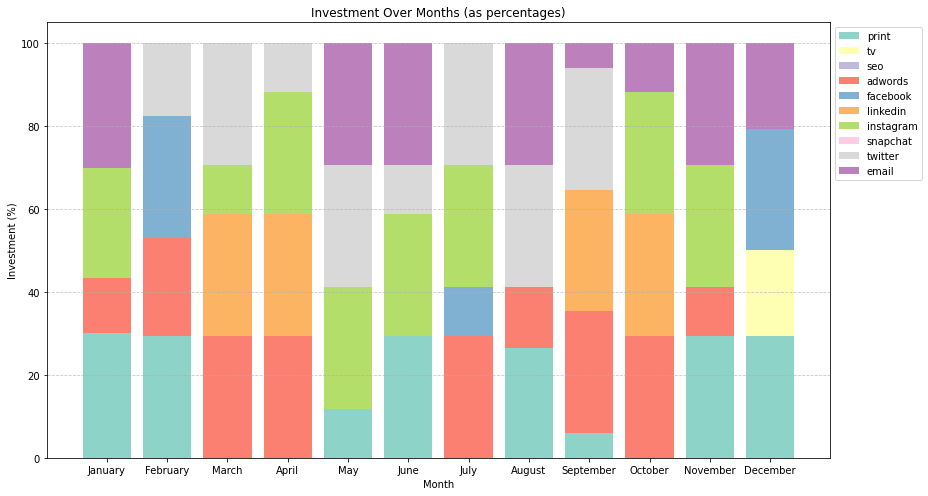

In [135]:
# Determine the number of platforms
n_platforms = len(allocation_df.columns[:-2])

# Convert the investments to percentages
percentage_df = allocation_df[allocation_df.columns[:-2]].divide(allocation_df['Budget'], axis=0) * 100

color_palette = sns.color_palette("Set3", n_platforms)

plt.figure(figsize=(13, 7))

# Plotting the stacked bar chart
bottom_values = [0] * len(percentage_df.index)
for i, platform in enumerate(percentage_df.columns):
    plt.bar(percentage_df.index, percentage_df[platform], bottom=bottom_values, color=color_palette[i], label=platform)
    bottom_values = [sum(values) for values in zip(bottom_values, percentage_df[platform])]

plt.title('Investment Over Months (as percentages)')
plt.xlabel('Month')
plt.ylabel('Investment (%)')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.xticks(rotation=0)

plt.legend(loc='upper left', bbox_to_anchor=(1, 1))

# Adjust the plot size to make room for the legend
# plt.subplots_adjust(right=0.7)

plt.ylim(0, 105)

plt.tight_layout()

# To save the plot as an image
# plt.savefig("platform_investments_stacked_bar_percentage.png", dpi=300)

plt.show()

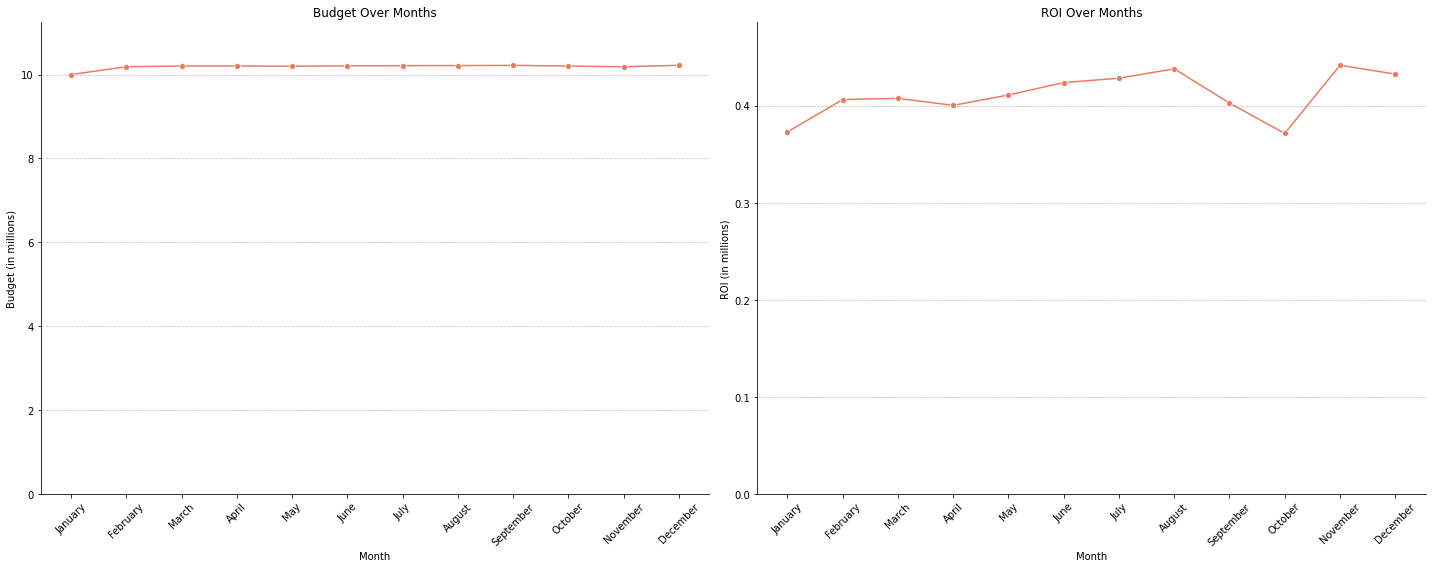

In [136]:
color = sns.color_palette("coolwarm", 10)[-2]

fig, axes = plt.subplots(1, 2, figsize=(20, 8))

# Plot for Budget over months using a line graph
sns.lineplot(x=allocation_df.index, y=allocation_df['Budget'], color=color, marker="o", ax=axes[0])
axes[0].set_title('Budget Over Months')
axes[0].set_ylabel('Budget (in millions)')
axes[0].set_xlabel('Month')
axes[0].grid(axis='y', linestyle='--', alpha=0.7)
axes[0].set_xticks(allocation_df.index)
axes[0].set_xticklabels(allocation_df.index, rotation=45)
axes[0].set_ylim(0, allocation_df['Budget'].max() + 0.1 * allocation_df['Budget'].max())

# Plot for ROI over months using a line graph
sns.lineplot(x=allocation_df.index, y=allocation_df['ROI'], color=color, marker="o", ax=axes[1])
axes[1].set_title('ROI Over Months')
axes[1].set_ylabel('ROI (in millions)')
axes[1].set_xlabel('Month')
axes[1].grid(axis='y', linestyle='--', alpha=0.7)
axes[1].set_xticks(allocation_df.index)
axes[1].set_xticklabels(allocation_df.index, rotation=45)
axes[1].set_ylim(0, allocation_df['ROI'].max() + 0.1 * allocation_df['ROI'].max())

sns.despine(ax=axes[0])
sns.despine(ax=axes[1])

plt.tight_layout()

# To save the plot as an image
# plt.savefig("monthly_trends.png", dpi=300)

plt.show()

### Acknowledgements

For assistance with data visualization and related code in this notebook, we referred ChatGPT, lecture slides, and notebooks

**Note:** We interpreted these constraints as if every column listed in the constraints will exist in the input data. We interpreted social media platforms as if it were an umbrella term, and added functionality to still compute the optimal solution if one of these platforms is deleted. However, since there is no way in the input file to identify if something is a social media, we did not support adding in a new social media platform to fall in this umbrella.